In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from nepali_stemmer.stemmer import NepStemmer
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from string import punctuation
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

## Web Screping News

* In this project we will fetch news of 7 province. These record is stored and predicted sentiment.

In [2]:
Pradesh1='https://www.onlinekhabar.com/content/desh-samachar/pradesh1/page/'
Pradesh2='https://www.onlinekhabar.com/content/desh-samachar/pradesh2/page/'
Pradesh3='https://www.onlinekhabar.com/content/desh-samachar/pradesh3/page/'
Pradesh4='https://www.onlinekhabar.com/content/desh-samachar/pradesh4/page/'
Pradesh5='https://www.onlinekhabar.com/content/desh-samachar/pradesh5/page/'
Pradesh6='https://www.onlinekhabar.com/content/desh-samachar/pradesh6/page/'
Pradesh7='https://www.onlinekhabar.com/content/desh-samachar/pradesh7/page/'


In [3]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:94.0) Gecko/20100101 Firefox/94.0',  'Accept-Language': 'en-US, en;q=0.5'}

In [4]:
webpage_content = requests.get(Pradesh1, headers=headers)
webpage_content = BeautifulSoup(webpage_content.content, 'html.parser')

#### Fetching Provience 1 headlines

In [5]:
Province1=[]
index=1
for page in range(1,2):
    try:
        webpage_content = requests.get(Pradesh1+str(page), headers=headers)
        webpage_content = BeautifulSoup(webpage_content.content, 'html.parser')
        for headlines in webpage_content.find_all('div', class_='span-4'):
            Province1.append([index, headlines.find('h2').text.strip()])
    except:
        continue

#### Fetching Provience 2 headlines

In [6]:
Province2=[]
index=2
for page in range(1,2):
    try:
        webpage_content = requests.get(Pradesh2+str(page), headers=headers)
        webpage_content = BeautifulSoup(webpage_content.content, 'html.parser')
        for headlines in webpage_content.find_all('div', class_='span-4'):
            Province2.append([index, headlines.find('h2').text.strip()])
    except:
        continue
        

#### Fetching Province 3 headlines

In [7]:
Province3=[]
index=3
for page in range(1,2):
    try:
        webpage_content = requests.get(Pradesh3+str(page), headers=headers)
        webpage_content = BeautifulSoup(webpage_content.content, 'html.parser')
        for headlines in webpage_content.find_all('div', class_='span-4'):
            Province3.append([index, headlines.find('h2').text.strip()])
    except:
        continue

In [8]:
Province4=[]
index=4
for page in range(1,2):
    try:
        webpage_content = requests.get(Pradesh4+str(page), headers=headers)
        webpage_content = BeautifulSoup(webpage_content.content, 'html.parser')
        for headlines in webpage_content.find_all('div', class_='span-4'):
            Province4.append([index, headlines.find('h2').text.strip()])
    except:
        continue

#### Fetchine Provience 5 headlines

In [9]:
Province5=[]
index=5
for page in range(1,2):
    try:
        webpage_content = requests.get(Pradesh5+str(page), headers=headers)
        webpage_content = BeautifulSoup(webpage_content.content, 'html.parser')
        for headlines in webpage_content.find_all('div', class_='span-4'):
            Province5.append([index, headlines.find('h2').text.strip()])
    except:
        continue

In [10]:
Province6=[]
index=6
for page in range(1,2):
    try:
        webpage_content = requests.get(Pradesh6+str(page), headers=headers)
        webpage_content = BeautifulSoup(webpage_content.content, 'html.parser')
        for headlines in webpage_content.find_all('div', class_='span-4'):
            Province6.append([index, headlines.find('h2').text.strip()])
    except:
        continue

#### Fetchine Provience 7 headlines

In [11]:
Province7=[]
for page in range(1,2):
    index=7
    try:
        webpage_content = requests.get(Pradesh7+str(page), headers=headers)
        webpage_content = BeautifulSoup(webpage_content.content, 'html.parser')
        for headlines in webpage_content.find_all('div', class_='span-4'):
            Province7.append([INDEX, headlines.find('h2').text.strip()])
    except:
        pass

#### Compile recode

In [12]:
compile = Province1+Province2+Province3+Province4+Province5+Province6+Province7

#### Convert recoder to dataframe

In [13]:
data_file = pd.DataFrame(compile,columns=['Province','Headlines'])


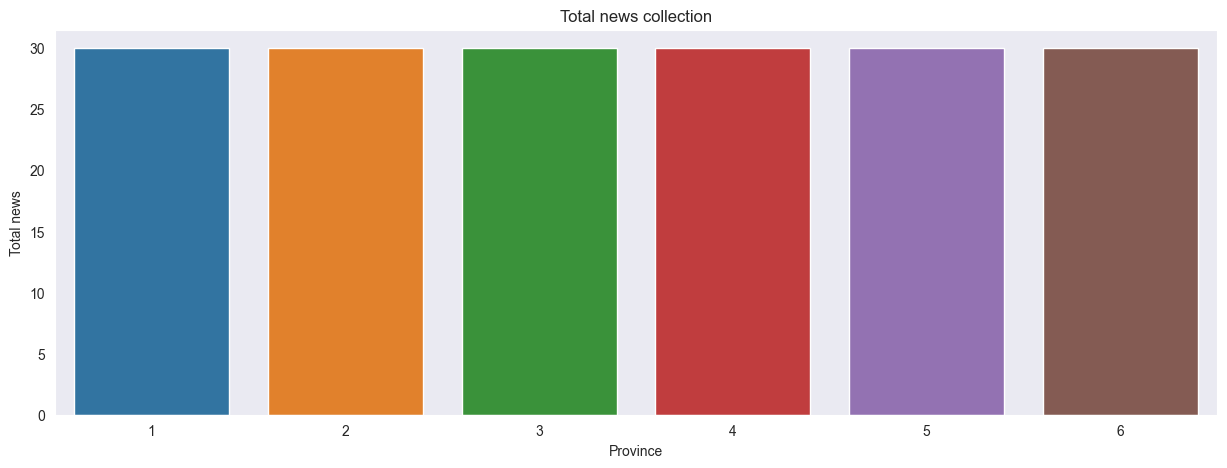

In [14]:
plt.figure(figsize=(15,5))
sns.set_style('dark')
sns.countplot(x='Province', data= data_file)
plt.title('Total news collection')
plt.xlabel('Province')
plt.ylabel('Total news')
plt.show()

In [15]:
data_file.to_excel('news.xlsx')

## Extract dataset for model

* To train the model dataset is downloaded from kaggle

In [16]:
df = pd.read_csv('/Users/IT Folders/Python/Deerwalk/Projects/News sentiment analysis/sentiment_analysis_nepali_final.csv')

###### About Dataset
* Sentiments Label meaning:

* -1: Negative Sentiment
* 0: Neutral Sentiment
* 1: Positive Sentiment

In [17]:
df.sample(5)


,Unnamed: 0,Sentences,Sentiment
1276,734,रखार तेसैले अब यो पानीपुरिको भाडो जस्ले उठायेक...,-1
19973,17650,सूचना आयोगले मृतक र कोभिड लागेका व्यक्तिको स्थ...,1
30446,28128,धनगढी उपमहानगर पालिकाका मेयर नृप वड आपतको यो स...,1
27666,25346,कोराना भाइरस कोभिड संक्रमणबाट लगभग नेपाल जोगिए...,1
950,397,नेपाललाई लिएर जज लाई गाली गर्नु मुर्खता हो,1


In [18]:
df=df.drop(columns=['Unnamed: 0'])

In [19]:
df.shape

(35789, 2)

In [20]:
df.isnull().sum()

Sentences    0
Sentiment    0
dtype: int64

In [21]:
df['Sentiment'].value_counts()


 1    15880
-1    14408
 0     5501
Name: Sentiment, dtype: int64

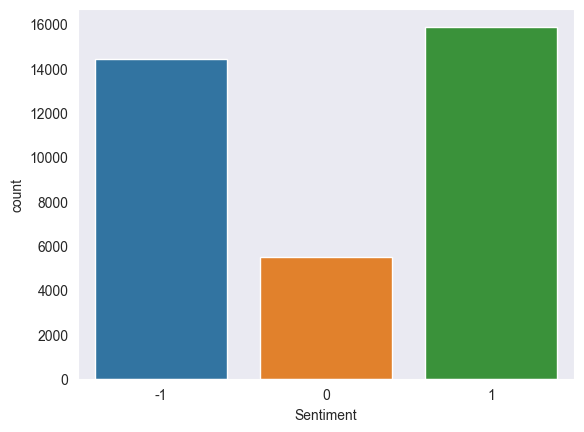

In [22]:
sns.countplot(x=df['Sentiment'])
plt.show()


## Feature Engineering

In [23]:
def preprocess(sentence):
    
    punctuations = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~।/'
    data1 =' '.join( [word for word in sentence.split() if word not in punctuations])
    
    data2 = ''.join((word for word in data1 if not word.isdigit()))
    
    data3 = NepStemmer().stem(data2)
    
    stopword = stopwords.words('nepali')
    data4 = ' '.join([word for word in data3.split() if word not in stopword])
    
    return data4


In [24]:
df['final sentence'] = df['Sentences'].apply(preprocess)


In [25]:
df.head()


,Sentences,Sentiment,final sentence
0,"म एक शिक्षक , शिक्षा क्षेत्रमा रमाएको मान्छे ।...",1,शिक्षक शिक्षा क्षेत्र रमाए मान्छे सामुदायिक वि...
1,म सरकारी स्कूल/कलेजमा पढेर करीब १२ बर्ष भन्दा ...,1,सरकारी स्कूल/कलेजमा पढेर करीब बर्ष बढी बिभिन्न...
2,कति राम्रो शिव मन्दिर देख्न पाइयो कुन ठाउको हो...,1,कति शिव मन्दिर देख्न पाइयो कुन ठाउ होला ?धन्यव...
3,मारुनी भन्ने वितिकै सामान्य नाचनीमा आधारित कथा...,1,मारुनी विति कै सामान्य नाचनी आधारित कथा होला ल...
4,यो फ्लिम हेरिसकेपछी थाहा भयो कि किन दर्सकहरुले...,1,फ्लिम हेरिसके पछी थाहा भयो दर्सक हरुले साम्राज...


In [26]:
X = df['final sentence']
Y = df['Sentiment']


In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2, random_state=True)


In [28]:
tfidf = TfidfVectorizer(max_features=3000)
tfidf.fit(xtrain)


TfidfVectorizer(max_features=3000)

In [29]:
tfidf_xtrain = tfidf.transform(xtrain)
tfidf_xtest = tfidf.transform(xtest)


## Build a model

In [32]:
svc = SVC(C=1, kernel='rbf',gamma=1)
svc.fit(tfidf_xtrain,ytrain)
y_pred = svc.predict(tfidf_xtest)
print(f'At regularization = 1 accuracy is {accuracy_score(ytest, y_pred)}')
    

At regularization = 1 accuracy is 0.6743503772003353


In [33]:
data_file.head()


,Province,Headlines
0,1,"सुनसरी र मोरङमा अति भारी वर्षा, ११ बजेसम्म उच्..."
1,1,कोशी सरकारलाई अदालतको त्रास र राप्रपाको आश
2,1,मोरङ कारागारमा कैदीबन्दीको मृत्यु
3,1,झापा गाउँपालिकाका अध्‍यक्षसहित ११ जनाविरुद्ध भ...
4,1,"इटहरीका होस्टलमा उपमहानगरको अनुगमन, एउटामा ताला"


In [34]:
data_file['final Headlines'] = data_file['Headlines'].apply(preprocess)


In [35]:
data_file.to_excel('news.xlsx')


In [36]:
data_file['final Headlines'][100]


'फिर्केखोला मापदण्ड मिटर बजेट आकार घट्यो'

In [37]:
x=tfidf.transform([data_file['final Headlines'][100]])


In [38]:
x.shape

(1, 3000)

In [39]:
if np.squeeze( svc.predict(x))==1:
    print('Positive')
if np.squeeze( svc.predict(x))==-1:
    print('Negative')
if np.squeeze( svc.predict(x))==0:
    print('Neutral')
    

Positive


## Save Model

In [40]:
pickle.dump(tfidf,open('Vectorizer.pkl','wb'))
pickle.dump(svc, open('Model.pkl','wb'))